<a href="https://colab.research.google.com/github/killerkiemklan/Data-Mining-24-25/blob/main/FS_Dimension_reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remove outliers before normalization


Have you missed some outliers?
Are there still missing values?
Is the data normalized?

In [29]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [30]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap


df = pd.read_csv('UMAP_df.csv')
df2 = pd.read_csv('cat_UMAP_df.csv')

In [2]:
df

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
0,0,18,2,5,1,0,1,0.00,0.00,0.00,...,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0
1,1,17,2,2,2,0,1,12.82,6.39,0.00,...,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0
2,2,38,1,2,2,0,1,9.20,0.00,0.00,...,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0
3,3,27,2,3,1,0,2,0.00,13.70,0.00,...,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0
4,4,20,2,5,0,0,2,14.57,40.87,0.00,...,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,30,1,1,1,91,91,0.00,0.00,18.04,...,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0
31871,31884,27,1,1,0,91,91,18.04,0.00,0.00,...,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0
31872,31885,24,1,1,1,91,91,0.00,0.00,0.00,...,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0
31873,31886,34,1,1,0,91,91,0.00,12.03,0.00,...,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0


In [12]:
# df_normalized = df_normalized.drop(columns=['Unnamed: 0'])


# dropping HR 0-23 for grouped columns for time of day,

# first & last order are taken in recency column so dropped

# By order percentage:

# High (>30%): Asian, American
# Medium (10-30%): OTHER, Italian, Japanese
# Low (<10%): remaining cuisines

# By Customer Lifetime Value (CLV) Score:

# High CLV (0.3-0.5)
# Medium CLV (0.2-0.3)
# Low CLV (0.0-0.2)

# By Age Group:

# <18
# 18-24
# 25-34
# 35-44
# 45-54
# 55+

# By Loyalty Rank:

# High (4.0 - 8.0)
# Medium (2.0 - 4.0)
# Low (0.0 - 2.0)

import pandas as pd

# Assuming df is your original DataFrame
df_copy = df.copy()

# Define columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
                   'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
                   'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
                   'HR_22', 'HR_23', 'first_order', 'last_order', 'customer_age']

# # CLV Score
# df['CLV_Group'] = pd.cut(df['CLV_Score'], bins=[0, 0.2, 0.3, 0.5], labels=['Low', 'Medium', 'High'])


# # Loyalty Rank
# df['Loyalty_Group'] = pd.cut(df['Loyalty_Rank'], bins=[0, 2, 4, 8], labels=['Low', 'Medium', 'High'])

# , 'CUI_Asian', 'CUI_American', 'CUI_OTHER', 'CUI_Italian', 'CUI_Japanese', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
                    #  'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
                    #  'CUI_Street_Food/Snacks', 'CUI_Thai'

# # Define cuisine groups
# high_freq_cuisines = ['CUI_Asian', 'CUI_American']
# medium_freq_cuisines = ['CUI_OTHER', 'CUI_Italian', 'CUI_Japanese']
# low_freq_cuisines = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
#                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
#                      'CUI_Street_Food/Snacks', 'CUI_Thai']

# # Create Age Group column
df_copy['Age_Group'] = pd.cut(df_copy['customer_age'], bins=[0, 18, 24, 34, 44, 54, 100], labels=['<18', '18-24', '25-34', '35-44', '45-54', '55+'])

# # Create a new column 'cuisine_group'
# def assign_cuisine_group(row):
#     if any(row[col] == 1 for col in high_freq_cuisines):
#         return '1'
#     elif any(row[col] == 1 for col in medium_freq_cuisines):
#         return '2'
#     else:
#         return '3'

# df_copy['cuisine_group'] = df_copy.apply(assign_cuisine_group, axis=1)

# Drop the specified columns
df_grouped = df_copy.drop(columns=columns_to_drop)

df_grouped

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,<18
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,<18
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,35-44
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,25-34
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,25-34
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,25-34
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,18-24
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,25-34


In [8]:

# By Customer Region (Order %):

# Regions: 8670, 4660, 2360
# Order % Range: 27.7% to 30.62%

# Regions: 2440, 4140, 8370, 8550
# Order % Range: 0,04 to 4.65%

# Define the regions (as strings)
main_regions = ['8670', '4660', '2360']
other_regions = ['2440', '4140', '8370', '8550']

# Create new columns for main regions
for region in main_regions:
    df2[f'Region_{region}'] = (df2['customer_region'] == region).astype(int)

# Create a single column for other regions
df2['Region_Other'] = (df2['customer_region'].isin(other_regions)).astype(int)

# If the customer_region contains a string like 'Region_8670',
# extract the numeric part:
df2['Region_Numeric'] = df2['customer_region'].str.extract('(\d+)')

# Now use the numeric region for comparison
for region in main_regions:
    df2[f'Region_{region}'] = (df2['Region_Numeric'] == region).astype(int)

df2['Region_Other'] = (df2['Region_Numeric'].isin(other_regions)).astype(int)

# Drop temporary and original columns
cat_df_grouped = df2.drop(columns=['customer_region', 'Region_Numeric'])

cat_df_grouped.head()

,Unnamed: 0,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,DELIVERY,DIGI,0,0,1,0
1,1,DISCOUNT,DIGI,1,0,0,0
2,2,DISCOUNT,CASH,0,1,0,0
3,3,DELIVERY,DIGI,0,1,0,0
4,4,-,DIGI,0,1,0,0


In [15]:
# Merge the two DataFrames on 'Unnamed: 0'
merged_df = pd.merge(df_grouped, cat_df_grouped, on='Unnamed: 0', how='inner')

# Print the merged DataFrame
merged_df.head(1)

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.0,90,2,1,0.0,0.010989,0.25,0.020362,0.092846,0,0,0,0,2,0,<18,DELIVERY,DIGI,0,0,1,0


In [24]:
import pandas as pd

# Assuming encoded_df is your DataFrame
encoded_df = pd.get_dummies(merged_df,
                            columns=['payment_method', 'Age_Group',
                                     'Age_Group', 'last_promo'])
# Specify all columns to one-hot encode

encoded_df = encoded_df.drop(columns=['Unnamed: 0'])

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer

def preprocess_data(df):
    """
    Complete preprocessing pipeline with median imputation,
    IQR-based outlier removal, and quantile normalization
    """
    # Store original column names
    original_columns = df.columns

    # Drop non-numeric columns
    df_numeric = df.select_dtypes(include='number')

    # 1. Median Imputation
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(
        imputer.fit_transform(df_numeric),
        columns=df_numeric.columns
    )

    # 2. Outlier Removal using 3 IQR
    Q1 = df_imputed.quantile(0.25)
    Q3 = df_imputed.quantile(0.75)
    IQR = Q3 - Q1

    # Create mask for values within 3 IQR
    mask = ~((df_imputed < (Q1 - 3 * IQR)) | (df_imputed > (Q3 + 3 * IQR))).any(axis=1)
    df_clean = df_imputed[mask]

    # 3. Standardization followed by Quantile Normalization
    # First standardize
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_clean),
        columns=df_numeric.columns
    )

    # Then apply quantile normalization
    quantile_transformer = QuantileTransformer(
        output_distribution='normal',
        n_quantiles=1000,
        random_state=42
    )
    df_normalized = pd.DataFrame(
        quantile_transformer.fit_transform(df_scaled),
        columns=df_numeric.columns
    )

    return df_normalized, mask

# Function to get preprocessing stats
def get_preprocessing_stats(original_df, final_df, mask):
    stats = {
        'original_rows': len(original_df),
        'rows_after_outlier_removal': len(final_df),
        'outliers_removed': len(original_df) - len(final_df),
        'outlier_percentage': (1 - len(final_df)/len(original_df)) * 100
    }
    return stats

# Example usage:
df_normalized, mask = preprocess_data(encoded_df)
stats = get_preprocessing_stats(encoded_df, df_normalized, mask)
print(stats)

{'original_rows': 31875, 'rows_after_outlier_removal': 2425, 'outliers_removed': 29450, 'outlier_percentage': 92.3921568627451}


In [26]:
df_normalized

,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Region_8670,Region_4660,Region_2360,Region_Other
0,1.077446,0.366873,0.997920,1.033716,-0.001255,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.381364,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.142483,0.637923,0.592882,0.121995,-0.370902,0.548158,5.199338,0.317650,5.199338,-5.199338,-5.199338,0.548158,0.592882,0.151030,-5.199338,-5.199338,1.494155,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
1,-0.234219,0.366873,0.997920,0.711309,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.381364,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.142483,0.637923,-0.468193,-1.187709,-0.370902,0.548158,5.199338,0.317650,-0.071571,1.261282,-5.199338,0.548158,-0.468193,-0.139351,-5.199338,-5.199338,1.494155,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
2,1.077446,2.144011,-5.199338,1.199821,2.247756,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.349498,-5.199338,-5.199338,-5.199338,-5.199338,1.142483,0.637923,5.199338,1.966889,2.696011,-0.198258,2.408550,0.345485,5.199338,-5.199338,-2.408550,-0.198258,5.199338,-0.295956,-5.199338,-5.199338,1.494155,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
3,-0.234219,0.366873,0.997920,0.647472,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.149742,-5.199338,1.142483,0.637923,-0.527013,-1.283553,-0.370902,-0.251016,1.968165,0.395204,-0.071571,1.261282,-1.968165,-0.251016,-0.527013,-0.628967,-5.199338,-5.199338,-5.199338,-5.199338,1.471555,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
4,-0.234219,1.070745,0.997920,0.870781,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.142483,1.142483,0.637923,-0.301254,-0.901416,0.989697,-0.455640,1.337127,0.586473,-0.071571,1.261282,-1.337127,-0.455640,-0.301254,-1.325746,-5.199338,-5.199338,-5.199338,-5.199338,1.471555,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,-0.234219,0.366873,0.064027,-5.199338,0.520120,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.149742,-5.199338,-5.199338,-0.423855,0.258792,0.916977,1.505747,0.548158,-5.199338,-5.199338,-0.071571,-5.199338,5.199338,0.548158,0.258792,2.650327,-5.199338,-5.199338,-5.199338,-5.199338,0.651824,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
2421,-0.234219,0.366873,0.064027,1.505888,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.149742,-5.199338,-5.199338,-0.423855,0.240652,0.899534,1.505747,0.548158,-5.199338,-5.199338,-0.071571,-5.199338,5.199338,0.548158,0.240652,2.643582,-5.199338,-5.199338,-5.199338,-5.199338,0.651824,-5.199338

KeyError: 'Loyalty_Rank'

In [27]:
# # List of column pairs with correlation > 0.8
# high_corr_pairs = []

# for i in range(len(df_corr.columns)):
#     for j in range(i):
#         if abs(df_corr.iloc[i, j]) > 0.8:
#             high_corr_pairs.append((df_corr.columns[i], df_corr.columns[j]))

# print("Correlation Matrix:")
# df_corr.round(2)

# print("\nColumn Pairs with Correlation > 0.8:")
# for pair in high_corr_pairs:
#     print(f"{pair[0]} and {pair[1]}")

NameError: name 'df_corr' is not defined

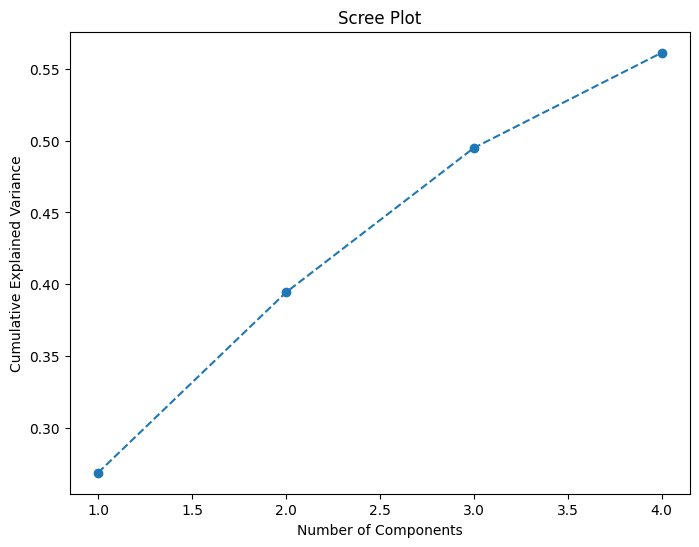

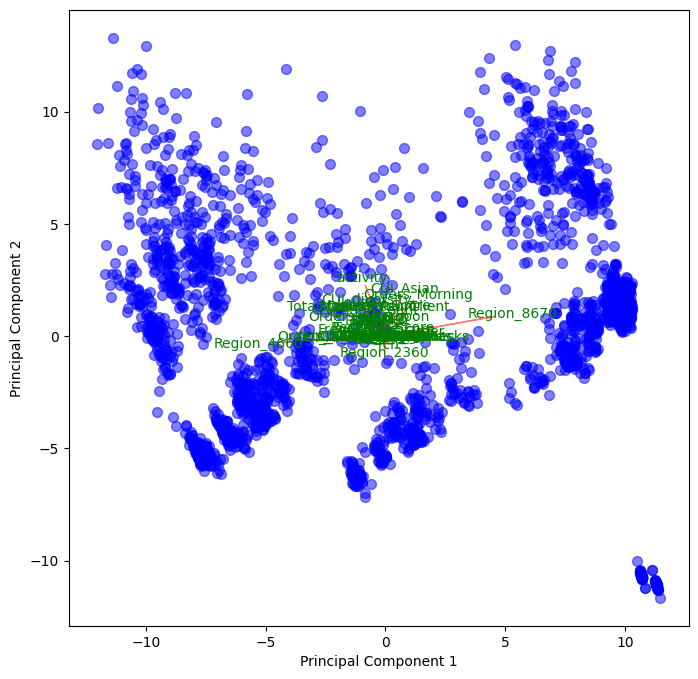

Principal Component Loadings:

Principal Component 1:
vendor_count: -0.07
product_count: -0.08
is_chain: -0.12
CUI_American: -0.21
CUI_Asian: 0.09
CUI_Beverages: 0.00
CUI_Cafe: 0.00
CUI_Chicken_Dishes: 0.00
CUI_Chinese: 0.00
CUI_Desserts: 0.00
CUI_Healthy: 0.00
CUI_Indian: 0.00
CUI_Italian: 0.00
CUI_Japanese: 0.00
CUI_Noodle_Dishes: 0.00
CUI_OTHER: 0.00
CUI_Street_Food/Snacks: 0.00
CUI_Thai: 0.00
DOW_0: -0.01
DOW_1: -0.02
DOW_2: 0.00
DOW_3: -0.04
DOW_4: -0.08
DOW_5: -0.05
DOW_6: -0.05
Total_Orders_Per_Client: -0.08
mnt: -0.05
mnt_Per_Order: 0.04
Items_Per_Order: 0.01
frq: -0.04
rcn: 0.02
activity: -0.11
CUI_diversity: -0.09
Loyalty: -0.11
Recency_Score: -0.02
Frequency_Score: -0.04
Monetary_Score: -0.05
CLV_Score: -0.00
Orders_Night: 0.00
Orders_Dawn: 0.00
Orders_Morning: 0.16
Orders_Afternoon: -0.08
Orders_Evening: -0.26
Orders_Dusk: 0.00
Region_8670: 0.62
Region_4660: -0.62
Region_2360: -0.01
Region_Other: 0.00

Principal Component 2:
vendor_count: 0.20
product_count: 0.23
is_chain: 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df_normalized is your normalized DataFrame

# Apply PCA
pca = PCA(n_components=4)  # Change to X components
principal_components = pca.fit_transform(df_normalized)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3', 'PC4'])  # Update column names

# Scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('scree_plot.svg', format='svg')
plt.show()

# Biplot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = plt.figure(figsize=(8,8))
for i, feature in enumerate(df_normalized.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.5)
    plt.text(loadings[i,0] * 1.15, loadings[i,1] * 1.15, feature, color='g', ha='center', va='center')

plt.scatter(principal_components[:,0], principal_components[:,1], c='b', s=50, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('biplot.svg', format='svg')
plt.show()

print("Principal Component Loadings:")
for i in range(4):  # Change to X components
    print(f"\nPrincipal Component {i+1}:")
    for j, loading in enumerate(pca.components_[i]):
        print(f"{df_normalized.columns[j]}: {loading:.2f}")

PCA analysis finetunen met elbow point ETC

# **PCA analysis by GPT**

### Advanced Analysis of Principal Components and Feature Relationships

#### Principal Component 1 (PC1): Regional Contrast with Temporal Ordering and Loyalty Influence
- **Key Observations**:
  - The most prominent features are `Region_8670` (strong positive loading) and `Region_4660` (strong negative loading), making this component a clear separator based on geography.
  - Additional contributions from `Orders_Morning` (positive) and `Orders_Evening` (negative) indicate that time-of-day preferences for ordering vary significantly between these regions.
  - Negative loadings for `Loyalty`, `activity`, and `CUI_diversity` suggest that lower loyalty, less diverse ordering patterns, and lower activity are associated with one end of the spectrum on PC1.

- **Deeper Connections**:
  - **Regional Dynamics**: Region 8670 appears to have more activity in the morning, whereas Region 4660 leans towards evening activity. This might reflect cultural or operational differences (e.g., urban vs. suburban areas, work schedules).
  - **Customer Loyalty and Engagement**: Higher loyalty, activity, and diversity scores lean towards one end, perhaps indicating that in Region 4660, customer loyalty programs or incentives could be beneficial, as loyalty and activity levels may be relatively lower there.
  - **Operational Insight**: For Region 8670, strategies that cater to morning orders (such as morning promotions, breakfast menus) could perform well, while Region 4660 might benefit from evening-targeted marketing or dinner-focused offerings.

#### Principal Component 2 (PC2): Customer Engagement & Order Volume with Asian Cuisine Preference
- **Key Observations**:
  - This component is influenced by general customer engagement metrics: `Total_Orders_Per_Client`, `mnt` (spend), `product_count`, and `vendor_count`.
  - There’s a notable positive loading for `CUI_Asian`, suggesting that Asian cuisine preferences align with higher engagement and order volumes.
  - Consistent positive loadings across the days of the week (`DOW_0` to `DOW_6`) imply that customers who score high on this component order frequently across all days, indicating steady engagement.

- **Deeper Connections**:
  - **High-Value and Loyal Customers**: PC2 likely captures a high-value segment — customers who order frequently, spend more, and have a strong preference for Asian cuisine. These customers may represent a "core" group for businesses offering Asian options.
  - **Loyalty Programs and Promotions**: This high-spending group is ideal for loyalty or rewards programs to encourage repeat purchases. Offering Asian cuisine-related promotions or discounts could maximize engagement with this segment.
  - **Customer Lifetime Value (CLV)**: With positive influences from `Loyalty` and `activity`, PC2 may represent customers with a high Customer Lifetime Value (CLV). This insight is valuable for targeted marketing, as this group has the potential to provide sustained revenue.

#### Principal Component 3 (PC3): Chain Status and Region 2360 with American Cuisine Preference
- **Key Observations**:
  - High positive loading on `Region_2360` and a negative loading on `Region_4660` suggests PC3 differentiates Region 2360 from others, with a bias toward `is_chain`.
  - Positive contributions from `CUI_American` indicate a preference for American cuisine, while `CUI_Asian` has a negative impact.
  - The `is_chain` feature’s positive loading indicates that chain restaurants or vendors are more prominent in Region 2360.

- **Deeper Connections**:
  - **Chain and Independent Business Strategy**: In Region 2360, where chain businesses are prominent and American cuisine is popular, a strategy focused on franchise chains (like offering standardized menus or loyalty programs) might perform well. For Region 4660, independent vendors might be more successful with specialized offerings.
  - **Cuisine-Specific Targeting**: Since American cuisine preference aligns positively with this component, businesses might do well by promoting American cuisine heavily in Region 2360.
  - **Region 4660 as a Niche Market**: Given that Region 4660 loads negatively here, it may represent a unique or less chain-dominated market. Region-specific offerings tailored to independent businesses or unique, non-chain menus could resonate well.

#### Principal Component 4 (PC4): Chain Status with American vs. Asian Cuisine Preference
- **Key Observations**:
  - This component has high positive loadings for `CUI_American` and negative loadings for `CUI_Asian`, indicating a strong distinction between these two cuisine preferences.
  - There is also a high loading for `is_chain`, suggesting that chain status is a significant differentiator here.

- **Deeper Connections**:
  - **Cuisine Preference Divide**: PC4 appears to capture a broader cuisine divide between American and Asian, with chain restaurants leaning more towards American cuisine. This might reflect customer preferences that can inform menu design.
  - **Targeting Chain vs. Independent Strategies**: Chains might benefit from focusing on American cuisine, especially if they aim to appeal to a broad customer base. On the other hand, independent vendors could stand out by offering diverse or Asian cuisine options.
  - **Customer Segmentation**: This component could help segment customers or vendors based on cuisine preference and chain affiliation, allowing for more targeted promotions. For example, chains can focus on classic American items, while independents could promote Asian-inspired specialties to attract a niche audience.

### Synthesis and Strategic Recommendations
Given the feature contributions across components, here are some refined strategies and insights that leverage these findings:

1. **Regional Customization**:
   - **Region 8670**: Focus on morning ordering trends, and consider breakfast promotions or early bird offers.
   - **Region 4660**: Target evening orders with dinner-oriented offerings or happy hour specials.
   - **Region 2360**: Chain restaurants offering American cuisine could thrive here, so prioritize chain-oriented loyalty programs and promotions.
   
2. **Cuisine-Specific Promotions**:
   - **American Cuisine**: Broad appeal, especially in chain-heavy regions, so it may benefit from standardized promotions and loyalty offers at chain outlets.
   - **Asian Cuisine**: Resonates with high-engagement, high-value customers, so offers that encourage repeat orders (e.g., discounts on frequent orders) could capitalize on this preference.

3. **Customer Segmentation by Engagement Level**:
   - **High-Engagement Customers** (high on PC2): These customers, who order frequently and show loyalty, are prime for loyalty programs, exclusive offers, and VIP treatment. Since they favor Asian cuisine, Asian-themed loyalty perks could increase retention.
   - **Low-Engagement or Diverse Taste Customers** (lower on PC2, high CUI_diversity): Consider limited-time offers on diverse or rotating menu items to stimulate interest and engagement in this group.

4. **Chain vs. Independent Business Strategy**:
   - **Chains**: Should focus on American cuisine and cater to Regions 2360 and 8670, where chains and American cuisine have more traction. Standardized promotions and broad appeal items will likely work well.
   - **Independent Businesses**: In regions less influenced by chains, such as Region 4660, independents can differentiate by offering unique or region-specific menu items and focusing on customer experience to build loyalty.

5. **Time-of-Day and Week Pattern Optimization**:
   - Customers in certain regions and with particular cuisine preferences show time-of-day patterns. Morning-oriented promotions might work well for high-activity, loyal customers, while evening offerings are better for regions with evening preference (e.g., Region 4660).
   - **Day-of-Week Patterns**: Weekly engagement consistency suggests a stable customer base, so daily promotional rhythms (e.g., weekly specials) might be less critical than monthly loyalty offers or cuisine-themed weeks.

### Conclusion
This PCA analysis provides valuable insights into the main factors driving customer behavior across regions, cuisine preferences, and engagement levels. The key drivers identified — such as regional differences, cuisine preference (American vs. Asian), chain vs. independent status, and time-of-day preferences — allow for well-targeted strategies. Each principal component reveals a unique slice of the data's complexity, making it possible to segment customers and vendors effectively, optimize offerings, and design marketing strategies that align closely with observed behaviors.

Further, this PCA could serve as a foundation for clustering or segmentation analysis, refining customer or vendor personas based on these PCA-driven characteristics. Ultimately, these insights can help align business operations, marketing strategies, and customer relationship management to better serve distinct segments within the data.


**List features with near-zero loadings across multiple PCs.**

Example: CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle_Dishes, CUI_OTHER, CUI_Street_Food/Snacks, CUI_Thai, Orders_Night, Orders_Dawn, Orders_Dusk, mnt_Per_Order, Items_Per_Order, frq, rcn, Recency_Score, Frequency_Score, Monetary_Score, CLV_Score.

**Combine Related Features:**

Cuisine Categories: Combine CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, etc., into a single feature like CUI_General.

Temporal Ordering: Combine Orders_Night, Orders_Dawn, Orders_Dusk into a single feature like Orders_Inactive_Periods.

RFM Scores: Combine Recency_Score, Frequency_Score, Monetary_Score into a single RFM_Score.

**Drop Irrelevant Features:**

Drop features that are not contributing to the variance and are not related to other features.

Example: mnt_Per_Order, Items_Per_Order, frq, rcn, CLV_Score.

In [ ]:
# drop more and do T-SNE to compare

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


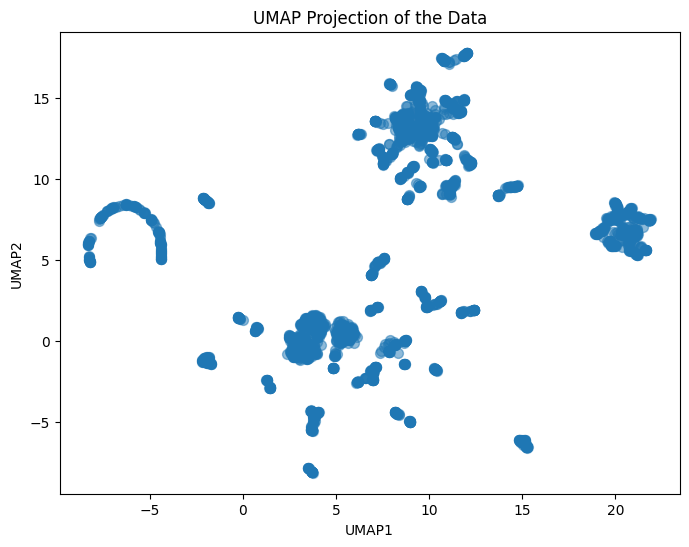

In [33]:
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(df_normalized)

umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])

plt.figure(figsize=(8, 6))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], s=50, alpha=0.5)
plt.title('UMAP Projection of the Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.savefig('umap_projection.svg', format='svg')
plt.show()

In [36]:
umap_df.to_csv('umap_embeddings.csv', index=False)

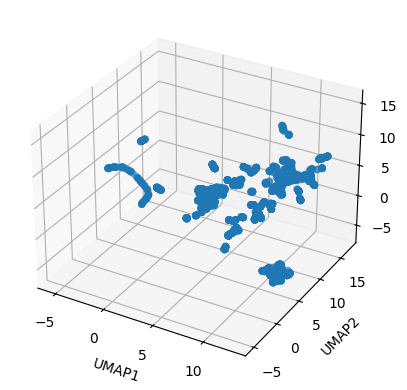

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# df_normalized = high-dimensional data
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(df_normalized)

# Plotting the 3D UMAP embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2])

ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')

plt.show()